In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

In [9]:
np.random.seed(2018)

n = 100
maxdegree = 14
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

In [10]:
train_mse = np.zeros(maxdegree)
test_mse = np.zeros(maxdegree)
poly_degree = np.zeros(maxdegree)

# Divide in test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Scale the data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [11]:
for degree in range(maxdegree):
    
    # Fitting of the model
    model = make_pipeline(PolynomialFeatures(degree = degree), LinearRegression(fit_intercept = False))
    clf = model.fit(x_train_scaled, y_train)

    # Prediction
    y_fit = clf.predict(x_train_scaled)
    y_pred = clf.predict(x_test_scaled)
    poly_degree[degree] = degree

    # Computation of the MSE for train and test data
    test_mse[degree] = np.mean((y_test-y_pred)**2)
    train_mse[degree] = np.mean((y_train-y_fit)**2)

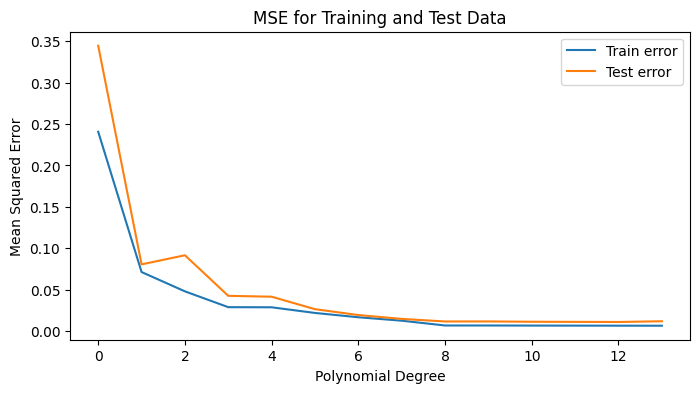

In [12]:
# Plotting MSE for training and test data
plt.figure(figsize=(8, 4))
plt.plot(poly_degree, train_mse, label='Train error')
plt.plot(poly_degree, test_mse, label='Test error')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Training and Test Data')
plt.legend()
plt.show()

**Bias-Variance tradeoff**

In [13]:
n_boostraps = 100

error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)

Polynomial degree: 0
Error: 0.3473449261227775
Bias^2: 0.34442891766377043
Var: 0.0029160084590072123
0.3473449261227775 >= 0.34442891766377043 + 0.0029160084590072123 = 0.3473449261227776
Polynomial degree: 1
Error: 0.0832086931518046
Bias^2: 0.08079415054390508
Var: 0.002414542607899523
0.0832086931518046 >= 0.08079415054390508 + 0.002414542607899523 = 0.08320869315180461
Polynomial degree: 2
Error: 0.09343098322594835
Bias^2: 0.09094327576313589
Var: 0.002487707462812478
0.09343098322594835 >= 0.09094327576313589 + 0.002487707462812478 = 0.09343098322594837
Polynomial degree: 3
Error: 0.04412863340553517
Bias^2: 0.04275546430846189
Var: 0.0013731690970732802
0.04412863340553517 >= 0.04275546430846189 + 0.0013731690970732802 = 0.04412863340553517
Polynomial degree: 4
Error: 0.04470908847589711
Bias^2: 0.0424098690304356
Var: 0.0022992194454615074
0.04470908847589711 >= 0.0424098690304356 + 0.0022992194454615074 = 0.04470908847589711
Polynomial degree: 5
Error: 0.028280188155767834
Bi

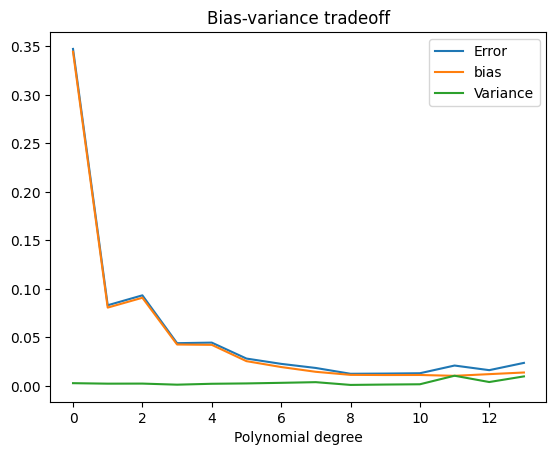

In [14]:
for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree = degree), LinearRegression(fit_intercept = False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_ = resample(x_train, y_train)
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

    poly_degree[degree] = degree
    error[degree] = np.mean(np.mean((y_test - y_pred)**2, axis = 1, keepdims = True))
    bias[degree] = np.mean((y_test - np.mean(y_pred, axis = 1, keepdims = True))**2)
    variance[degree] = np.mean(np.var(y_pred, axis = 1, keepdims = True))
    print('Polynomial degree:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree] + variance[degree]))

plt.plot(poly_degree, error, label='Error')
plt.plot(poly_degree, bias, label='bias')
plt.plot(poly_degree, variance, label='Variance')
plt.xlabel("Polynomial degree")
plt.title("Bias-variance tradeoff")
plt.legend()
plt.show()